In [34]:
# import pymc as pm
import numpy as np
import pandas as pd
import seaborn as sns
import scipy, scipy.stats
import pylab
from matplotlib import pyplot as plt
# from pymc.Matplot import plot as mcplot

%matplotlib inline
plt.rcParams["figure.figsize"] = [9, 5]

sns.set(color_codes = True)
sns.set_context('notebook', font_scale=1, rc={"lines.linewidth": 1})
sns.set_style("white")
sns.set_style("ticks")


np.random.seed(1)

Rozkład dwumianowy opisuje liczbę *k* sukcesów w ciągu *N* niezależnych prób, gdzie prawdopodobieństwo sukcesu jest stałe i równe *p*.

Rozkład dwumianowy można aproksymować rozkładem normalnym, gdzie $\mu = np$ oraz $\sigma = \sqrt{np(1-p)}$.

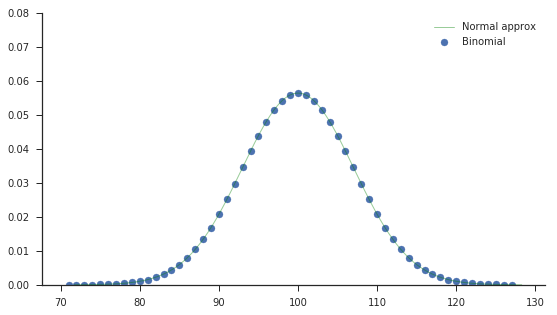

In [36]:
n = 200
p = 0.5

norm_mean = n * p
norm_sd = np.sqrt(n * p * (1 - p))

x_min, x_max = norm_mean - 4 * norm_sd, norm_mean + 4 * norm_sd
x_b = np.floor(np.arange(x_min, x_max, 1)) # punkty, dla których policzymy funkcję masy p-stwa rozkładu dwumianowego
x_n = np.arange(x_min, x_max, 0.01)

binom = scipy.stats.binom.pmf(x_b, n, p) # pmf - funkcja masy p-stwa (rozkłady dyskretne)
norm = scipy.stats.norm.pdf(x_n, loc=norm_mean, scale=norm_sd) # pdf - gęstość rozkładu p-stwa (rozkłady ciągłe)

plt.plot(x_n, norm, label='Normal approx', color='green', alpha=0.4)
plt.scatter(x_b, binom, label='Binomial')
plt.legend()
plt.ylim((0, 0.08))

sns.despine() # usuwa górną i prawą krawędź wykresu